# MTH 337: Week 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Quiz 5

Question 3 - "break" terminates a loop

In [2]:
for k in [4, 8, 15, 16, 23, 42]:
    print(k*3, end=' ')
    break

12 

Question 4

- total is holding the sum 1&ast;&ast;1 + 2&ast;&ast;2 + 3&ast;&ast;3
- note that 3&ast;&ast;3 = 27, not 9

In [3]:
total = 0
for i in range(1, 4):
    total += i**i
print(total)

32


## subplot (revisted)

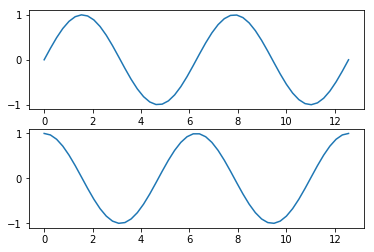

In [4]:
x = np.linspace(0, 4*np.pi)
plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Note that the rows and column passed to subplot don't have to be the same each time. Different values can be used to allow subplots of different sizes to be plotted on the same figure.

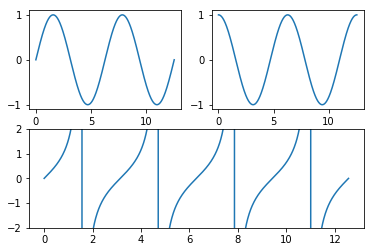

In [5]:
x = np.linspace(0, 4*np.pi, 1000)
plt.subplot(2, 2, 1) # 2 rows, 2 columns
plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2) # 2 rows, 2 columns
plt.plot(x, np.cos(x))
plt.subplot(2, 1, 2) # 2 rows, 1 column
plt.plot(x, np.tan(x))
plt.ylim(-2,2);

## Finding the Roots of a Function

The roots of a function f(x) are the values of x for which f(x) equals zero. Consider the equation cos(x) = x:

- This can be rewritten as cos(x) - x = 0.
- Finding a solution to this equation is equivalent to finding the roots of the function f(x) = cos(x) - x.

In [6]:
def myf(x):
    return np.cos(x) - x

Plotting f(x) on the interval [0, $\pi/2$] shows that a root exists in this interval.

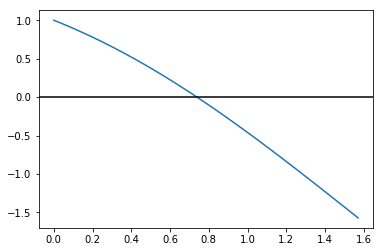

In [7]:
xvals = np.linspace(0, np.pi/2)
plt.plot(xvals, myf(xvals))
plt.axhline(color='k');

### The Bisection Method

The bisection method starts with an interval that contains a root. It proceeds to repeatedly cut the interval in half, while ensuring that the root stays in the interval.

Given a function f(x):

- Choose a "bracket" [a, b] of the root with sign(f(a)) $\neq$ sign(f(b)).
- Evaluate f at the midpoint of the bracket, c = (a + b)/2
- "Replace" either a or b by c, to keep f(a) and f(b) of opposite sign.
- Repeat while the bracket width b - a is greater than some given tolerance.

In [8]:
def mybisection(f, a, b, tolerance):
    sign_a, sign_b = np.sign(f(a)), np.sign(f(b))
    step = 0
    while b - a > tolerance:
        c = (a + b)/2
        print("{:3d} {}".format(step, c))
        sign_c = np.sign(f(c))
        if sign_c == 0:
            return c
        elif sign_c == sign_a:
            a = c
        else:
            b = c
        step += 1
    return (a + b)/2

In [9]:
mybisection(myf, 0, np.pi/2, 1e-7)

  0 0.7853981633974483
  1 0.39269908169872414
  2 0.5890486225480862
  3 0.6872233929727672
  4 0.7363107781851077
  5 0.760854470791278
  6 0.7485826244881928
  7 0.7424467013366502
  8 0.739378739760879
  9 0.7378447589729933
 10 0.7386117493669362
 11 0.7389952445639076
 12 0.7391869921623933
 13 0.7390911183631504
 14 0.739043181463529
 15 0.7390671499133397
 16 0.739079134138245
 17 0.7390851262506977
 18 0.7390881223069241
 19 0.7390866242788109
 20 0.7390858752647542
 21 0.7390855007577259
 22 0.7390853135042118
 23 0.7390852198774547


0.7390851730640762

If this is the correct answer x, it should be the case that cos(x) &approx; x. To check, we find the cosine of the output. This can be accessed using Out[n], where n is the index of the code cell. As can be seen below, cos(x) and x agree to 6 decimal places.

In [10]:
np.cos(Out[9])

0.73908510637245117

### The Relationship Between Accuracy and Number of Iteration Steps

We can say that the solution has converged to a certain number of digits *n* once the first *n* digits have stopped changing. For the bisection method above, this gives:

| Digits | Steps |
| :----: | :---: |
| 1      | 1     |
| 2 | 5 |
| 3 | 9 |
| 4 | 13 |
| 5 | 14 |
| 6 | 18 |
| 7 | 21 |

It can be seen that the number of accurate digits is roughly proportional to the number of steps, and that it takes (on average) 3 - 4 steps to gain one more digit of accuracy. This linear relationship can also be seen in the graph below.

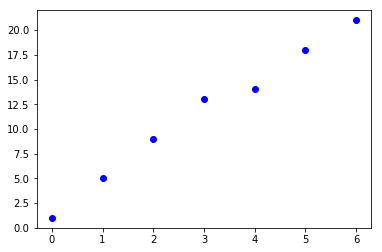

In [11]:
plt.plot([1,5,9,13,14,18,21], 'bo')

### Newton's Method

Newton's Method makes use of the values of both a function and it's derivative. We would hope that having more information about a function will let us converge to a root faster, and will see that this is actually the case.

The algorithm to find a root of f(x) proceeds as follows:

- Assume that f is differentiable and that values are available for both f and f'.
- Find the tangent to f(x) at the current estimate, $x_i$.
- Let $x_{i+1}$ be the intersection of this tangent with the x-axis.

This yields the iteration formula: $$x_{i + 1} = x_i - \frac{f(x_i)}{f'(x_i)}$$

We need both the value of a function and its derivative. The **return** statement can return multiple values, separated by commas.

In [12]:
def myfdf(x):
    return np.cos(x) - x, -np.sin(x) - 1

For a stopping condition, we'll use the magnitude of the last step and stop when this falls below a given tolerance.

In [13]:
def newton(fdf, x, tolerance):
    step = 0
    while True:
        f, df = fdf(x)
        print("{:3d} {}".format(step, x))
        dx = -f/df
        x += dx
        if np.abs(dx) <= tolerance:
            return x
        step += 1

Newton's Method converges to 16 significant figures in 4 steps

In [14]:
newton(myfdf, .5, 1e-10)

  0 0.5
  1 0.7552224171056364
  2 0.7391416661498792
  3 0.7390851339208068
  4 0.7390851332151607


0.73908513321516067

In [16]:
np.cos(Out[14])

0.73908513321516067

### Limitations of Newton's method

Use Newton's Method to find the root of tanh(x). We can see from the graph below that the root is at x = 0.

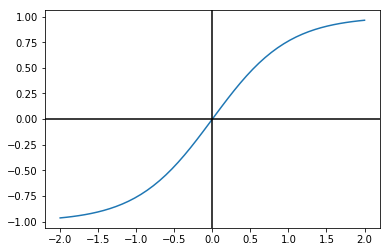

In [17]:
x = np.linspace(-2, 2)
plt.plot(x, np.tanh(x))
plt.axhline(color='k')
plt.axvline(color='k');

In [18]:
def tanhdf(x):
    return np.tanh(x), 1./np.cosh(x)**2

Since Newton's Method only converges when |x| &le; 1.0886, we use a "for" loop to limit the number of steps.

In [19]:
def newton(fdf, x, tolerance, maxsteps=10):
    for step in range(maxsteps):
        f, df = fdf(x)
        print("{:3d} {}".format(step, x))
        dx = -f/df
        x += dx
        if np.abs(dx) <= tolerance:
            return x

## Color Images

Color image arrays are 3D arrays of shape(rows, columns, 3). The '3' is for the three color components - red, green and blue.

We will use float arrays. Each color component is a float in the interval [0, 1] denoting the intensity of the color.

A red square has just the red components set to '1' (at index 0), and the other components set to '0'.

**imshow** displays a NumPy array as an image.

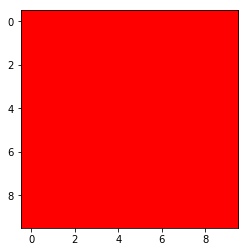

In [20]:
a = np.zeros((10, 10, 3))
a[:, :, 0] = 1.
plt.imshow(a);

A green square has just the green components set to '1' (at index 1), and the other components set to '0'.

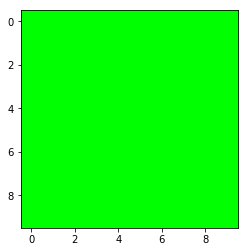

In [21]:
a = np.zeros((10, 10, 3))
a[:, :, 1] = 1.
plt.imshow(a);

A blue square has just the blue components set to '1' (at index 2), and the other components set to '0'.

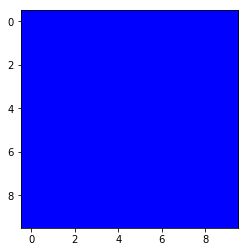

In [22]:
a = np.zeros((10, 10, 3))
a[:, :, 2] = 1.
plt.imshow(a);

**imshow** loads an image from a file into a NumPy 3d array.

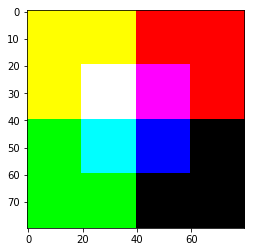

In [23]:
a = plt.imread('foo.png')
plt.imshow(a);

To reproduce this image, set the individual color components using NumPy array slicing and the '=' assignment operator. The colors are:

| Red | Green | Blue | Color |
| :-: | :---: | :--: | :---: |
| 0 | 0 | 0 | black |
| 1 | 0 | 0 | red |
| 0 | 1 | 0 | green |
| 0 | 0 | 1 | blue |
| 1 | 1 | 0 | yellow |
| 1 | 0 | 1 | magenta |
| 0 | 1 | 1 | cyan |
| 1 | 1 | 1 | white |

Note that:

- All colors in the top half of the image have the red component turned on.
- All colors in the left half of the image have the green component turned on.
- All colors in the center square of the image have the blue component turned on.

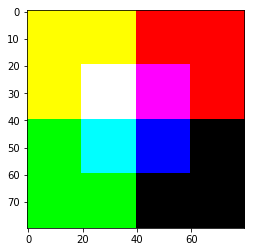

In [24]:
w, h = 80, 80
a = np.zeros((h, w, 3))
a[:40, :, 0] = 1
a[:, :40, 1] = 1
a[20:60, 20:60, 2] = 1
plt.imshow(a);